In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline
from ipywidgets import interact, IntSlider

In [2]:
# environment
dim = 2
grid_size = {'x': 20, 'y': 20} # to start out
domain_size = {'x': 20, 'y': 20} # to start out

# boundary_condition
# constant boundary condition
bc_left = 0
bc_right = 0
bc_top = 0
bc_bottom = 0

delta_x = domain_size['x'] / grid_size['x']
delta_y = domain_size['y'] / grid_size['y'] 

alpha_x = np.ones((grid_size['x'],grid_size['y']))
alpha_y = np.ones((grid_size['x'],grid_size['y']))

max_stable_time_step_x = delta_x**2 / (2 * np.max(alpha_x))
max_stable_time_step_y = delta_y**2 / (2 * np.max(alpha_y))
max_stable_time_step = max_stable_time_step_x if max_stable_time_step_x <= max_stable_time_step_y else max_stable_time_step_y
max_stable_time_step = 0.1

C_t = np.zeros((grid_size['x'],grid_size['y']))

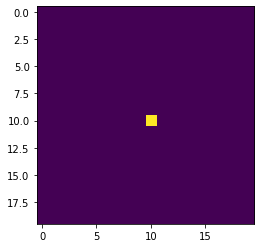

In [3]:
# initialization
C_t[10,10] = 2000
plt.imshow(C_t, vmin=0, vmax=20)

In [4]:
def alpha_interblock(alpha1, alpha2, harmonic=False):
    if not harmonic:
        return 0.5 * (alpha1 + alpha2)
    else:
        return 2 / ((1/alpha1) + (1/alpha2))


In [5]:
# simulating one time step
def simulate(C_t): 
        C_t1 = np.zeros((grid_size['x'],grid_size['y']))

        # inner cells
        for i in range(1, grid_size['x']-1):
                for j in range(1, grid_size['y']-1):
                        C_t1[i,j] = C_t[i,j] \
                                + max_stable_time_step/delta_x**2 * (alpha_interblock(alpha_x[i+1,j], alpha_x[i,j]) * C_t[i+1,j]
                                        - (alpha_interblock(alpha_x[i+1,j], alpha_x[i,j]) + alpha_interblock(alpha_x[i-1,j], alpha_x[i,j])) * C_t[i,j] 
                                        + alpha_interblock(alpha_x[i-1,j], alpha_x[i,j]) * C_t[i-1,j]) \
                                + max_stable_time_step/delta_y**2 * (alpha_interblock(alpha_y[i,j+1], alpha_y[i,j]) * C_t[i,j+1]
                                        - (alpha_interblock(alpha_y[i,j+1], alpha_y[i,j]) + alpha_interblock(alpha_y[i,j-1], alpha_y[i,j])) * C_t[i,j] 
                                        + alpha_interblock(alpha_y[i,j-1], alpha_y[i,j]) * C_t[i,j-1])
                        
        # boundary conditions
        # left
        for i in range(0, grid_size['y']):
               C_t1[i,0] = C_t[i,0] \
                        +  max_stable_time_step/delta_x**2 * (alpha_interblock(alpha_x[i,1], alpha_x[i,0]) * C_t[i,1] 
                                - (alpha_interblock(alpha_x[i,1], alpha_x[i,0]) + 2 * alpha_x[i,0]) * C_t[i,0]
                                + 2 * alpha_x[i,0] * bc_left)

        # right
        n = grid_size['x'] - 1 # maximum index in x-direction (columns)
        for i in range(0, grid_size['y']):
               C_t1[i,n] = C_t[i,n] \
                        +  max_stable_time_step/delta_x**2 * (2 * alpha_x[i,n] * bc_right 
                                - (alpha_interblock(alpha_x[i,n-1], alpha_x[i,n]) + 2 * alpha_x[i,n]) * C_t[i,n]
                                + alpha_interblock(alpha_x[i,n-1], alpha_x[i,n]) * C_t[i,n-1])

        # top
        for j in range(0, grid_size['x']):
               C_t1[0,j] = C_t[0,j] \
                        +  max_stable_time_step/delta_y**2 * (alpha_interblock(alpha_y[1,j], alpha_x[0,j]) * C_t[1,j] 
                                - (alpha_interblock(alpha_y[1,j], alpha_y[0,j]) + 2 * alpha_y[0,j]) * C_t[0,j]
                                + 2 * alpha_y[0,j] * bc_top)

        # bottom
        m = grid_size['y'] - 1 # maximum index in y-direction (rows)
        for j in range(0, grid_size['x']):
               C_t1[m,j] = C_t[m,j] \
                        +  max_stable_time_step/delta_y**2 * (2 * alpha_y[m,j] * bc_bottom 
                                - (alpha_interblock(alpha_y[m,j], alpha_y[m-1,j]) + 2 * alpha_y[m,j]) * C_t[m,j]
                                + alpha_interblock(alpha_y[m,j], alpha_y[m-1,j]) * C_t[m-1,j])


        return C_t1

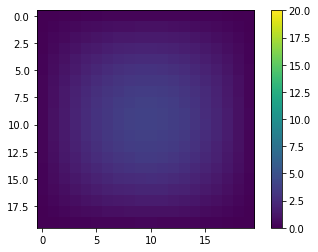

In [38]:
records = []

for i in range(1000):
    C_t = simulate(C_t)
    records.append(C_t)

# with np.printoptions(precision=2,floatmode='fixed',linewidth=200):
#     print(C_t)

plt.imshow(C_t, vmin=0, vmax=20)
plt.colorbar()
plt.show()


In [116]:
def update(w = 1):
    fig = plt.figure(figsize = (15,10))
    y = records[w]
    plt.imshow(y)
    
interact(update, w = IntSlider(min=0, max = 999, step = 1, value = 0))